In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from sklearn import linear_model

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)


## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [58]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Tasks, Part 1
Find the linear regression equation for mileage vs price.
Chart the original data and the equation on the chart.
Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [59]:
# Find the linear regression equation for this data for used car mileage to price.

input_data = df[['Mileage']]
output_data = df[['Price']]

regr = linear_model.LinearRegression()
regr.fit(input_data, output_data)
print(regr.coef_, regr.intercept_)
print(regr.score(input_data, output_data))

[[-0.1725205]] [ 24764.55900606]
0.0204634473235


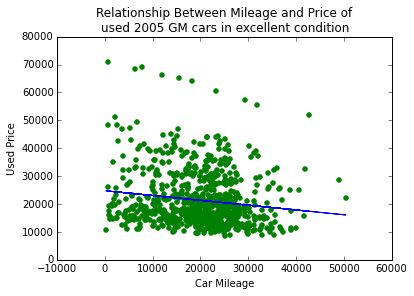

In [60]:
# Chart the original data and the equation on the chart.

plt.scatter(input_data, output_data, color='green')
plt.plot(input_data, regr.predict(input_data), color = 'blue')
plt.title('Relationship Between Mileage and Price of\nused 2005 GM cars in excellent condition')
plt.xlabel('Car Mileage')
plt.ylabel('Used Price')
plt.show()

### Observations:
The $R^2$ score does not indicate a strong relationship between mileage and car price, however inspection of the chart and real-world experience indicate that there is a strong correlation.

### -------------------------------------------------------------------------------------------------------

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.



In [67]:
# Use mileage, cylinders, liters, doors, cruise, sound, and leather to find 
# the linear regression equation.

def show_regression(cols):
    input_data = df[(list(cols))]
    output_data = df.Price
    regr = linear_model.LinearRegression()
    regr.fit(input_data, output_data)
    
#     print(cols)
#     print("Score is: ")
#     print(regr.score(input_data, output_data))
#     print(regr.coef_, regr.intercept_)


# poss_cols = ['Price', 'Mileage', 'Model', 
#             'Trim', 'Type', 'Cylinder', 
#             'Liter', 'Doors', 'Cruise', 
#             'Sound', 'Leather']

In [68]:
# Find the equation's R2 score (use the .score method) to determine whether 
# the equation is a good fit for this data. (0.8 and greater is considered 
# a strong correlation.)

poss_cols = ['Mileage', 'Cylinder', 
            'Liter', 'Doors', 'Cruise', 
            'Sound', 'Leather']

score_list = []

for num in range(1, len(poss_cols)):
    for x in combinations(poss_cols, num):
        print("X = {}, Num = {}".format(x, num))
        show_regression(x)
        score_list.append([regr.score(input_data, output_data), x])
        print("\n",score_list)
        
for x in score_list:
    sort(score_list)
# print("\n",score_list)


X = ('Mileage',), Num = 1

 [[0.020463447323489481, ('Mileage',)]]
X = ('Cylinder',), Num = 1

 [[0.020463447323489481, ('Mileage',)], [0.020463447323489481, ('Cylinder',)]]
X = ('Liter',), Num = 1

 [[0.020463447323489481, ('Mileage',)], [0.020463447323489481, ('Cylinder',)], [0.020463447323489481, ('Liter',)]]
X = ('Doors',), Num = 1

 [[0.020463447323489481, ('Mileage',)], [0.020463447323489481, ('Cylinder',)], [0.020463447323489481, ('Liter',)], [0.020463447323489481, ('Doors',)]]
X = ('Cruise',), Num = 1

 [[0.020463447323489481, ('Mileage',)], [0.020463447323489481, ('Cylinder',)], [0.020463447323489481, ('Liter',)], [0.020463447323489481, ('Doors',)], [0.020463447323489481, ('Cruise',)]]
X = ('Sound',), Num = 1

 [[0.020463447323489481, ('Mileage',)], [0.020463447323489481, ('Cylinder',)], [0.020463447323489481, ('Liter',)], [0.020463447323489481, ('Doors',)], [0.020463447323489481, ('Cruise',)], [0.020463447323489481, ('Sound',)]]
X = ('Leather',), Num = 1

 [[0.020463447323489

NameError: name 'sort' is not defined

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [63]:
# s = pd.Series(list('Make', 'Model', 'Type'))

dummies = pd.get_dummies(df['Make'])
print(dummies)

     Buick  Cadillac  Chevrolet  Pontiac  SAAB  Saturn
0        1         0          0        0     0       0
1        1         0          0        0     0       0
2        1         0          0        0     0       0
3        1         0          0        0     0       0
4        1         0          0        0     0       0
5        1         0          0        0     0       0
6        1         0          0        0     0       0
7        1         0          0        0     0       0
8        1         0          0        0     0       0
9        1         0          0        0     0       0
10       1         0          0        0     0       0
11       1         0          0        0     0       0
12       1         0          0        0     0       0
13       1         0          0        0     0       0
14       1         0          0        0     0       0
15       1         0          0        0     0       0
16       1         0          0        0     0       0
17       1